# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs.

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test', correspondingly.
    
#### And show some training images by visualising a few images from the training set.

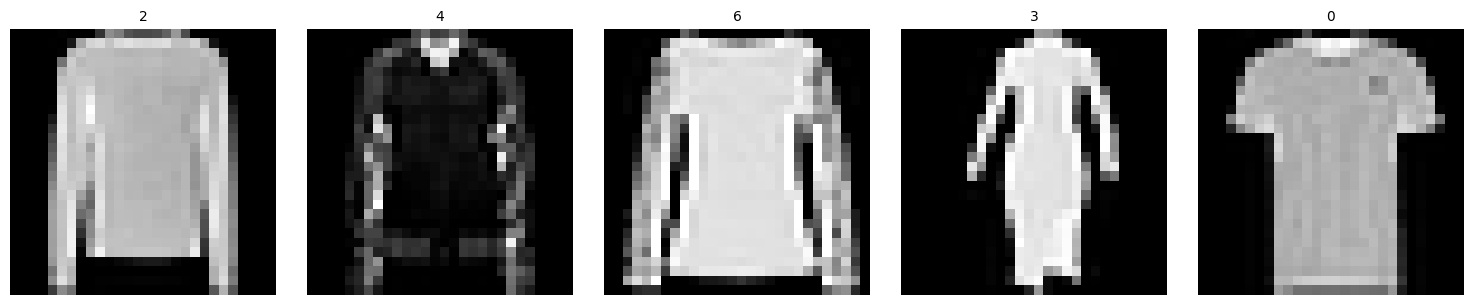

In [1]:
import mnist_reader
import matplotlib.pyplot as plt
import numpy as np

# load data
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# The value of each pixel ranges from 0 to 255 (RGB color), Normalize the dataset to 0~1
# ML model will run faster if data is normalized
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# from sklearn.preprocessing import Normalizer, StandardScaler # To normalize data

# Normalize the dataset using Normalizer
# normalizer = Normalizer(norm='l2')
# X_train = normalizer.fit_transform(X_train.astype('float32'))
# X_test = normalizer.fit_transform(X_test.astype('float32'))

# Use StandardScaler to sacle
# X_train= StandardScaler().fit_transform(X_train.astype('float32'))
# X_test = StandardScaler().fit_transform(X_test.astype('float32'))

# To plot random images
np.random.seed(0)
num_images_to_show = 5
image_index = np.random.randint(0, 60000, num_images_to_show)
axis_index = np.arange(0, num_images_to_show)

# Function to plot random images
def plot_random_images(x_image, y_pred=None, y_label=y_train, kind=None, axis_index=axis_index, image_index=image_index, num_images_to_show=5):
    '''
    It creates a figure (fig) and a grid of subplots (axes) arranged in one row (1) and num_images_to_show columns, where num_images_to_show is the number of images you want to display. The figsize parameter specifies the width and height of the entire figure in inches.
    '''
    # Define category names (according to the Fashion-MNIST documentation on GitHub)
    category_names = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }

    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
    
    for axis, image in zip(axis_index, image_index):
        axes[axis].imshow(x_image[image].reshape(28, 28), cmap='gray') # Reshapes the image data from a flat array to a 28x28 matrix

        if kind == None:
            title = y_label[image]
        elif kind == "show_label":
            title = category_names[y_label[image]]
            axes[axis].set_title(title, fontsize=10)  # Set the title to the corresponding category
        else:
            # Get predicted and ground-truth category names
            pred_category_name = category_names[y_pred[image]]
            true_category_name = category_names[y_label[image]]

            # Set title as "predicted category name (ground-truth category name)"
            title = f"{pred_category_name} ({true_category_name})"
            
        axes[axis].set_title(title, fontsize=10)  # Set the title to the corresponding category
        axes[axis].axis('off') # Hide axis scale

    plt.tight_layout() # Adjust the spacing between subplots to prevent overlapping elements.
    plt.show()

plot_random_images(X_train)

#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



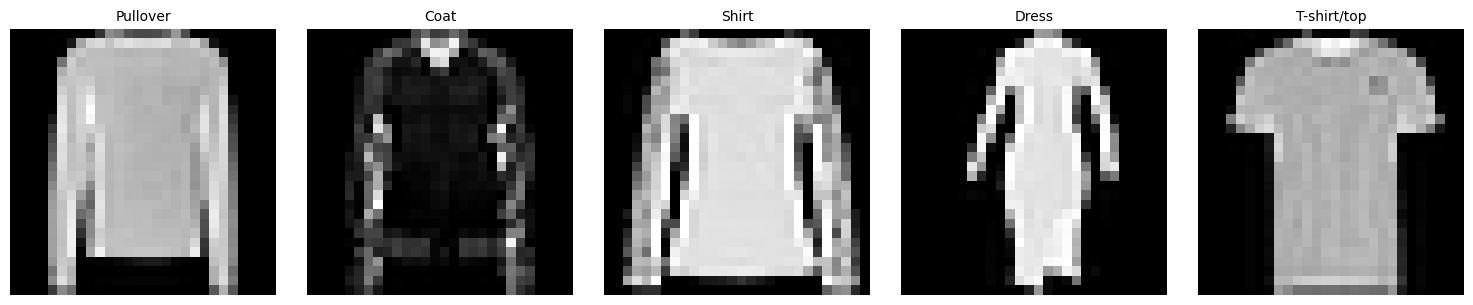

In [2]:
plot_random_images(X_train, kind="show_label")

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

##### Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular

In [3]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Generate report of classification 
num_images = np.shape(X_train)[0]

def generate_classification_report(y_test, y_pred, num_images=num_images):
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on the test set: {accuracy:.4f}")

    print(f"Classification Report for SVM Classifier with {num_images} samples:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix to compare predicted and ground-truth label
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

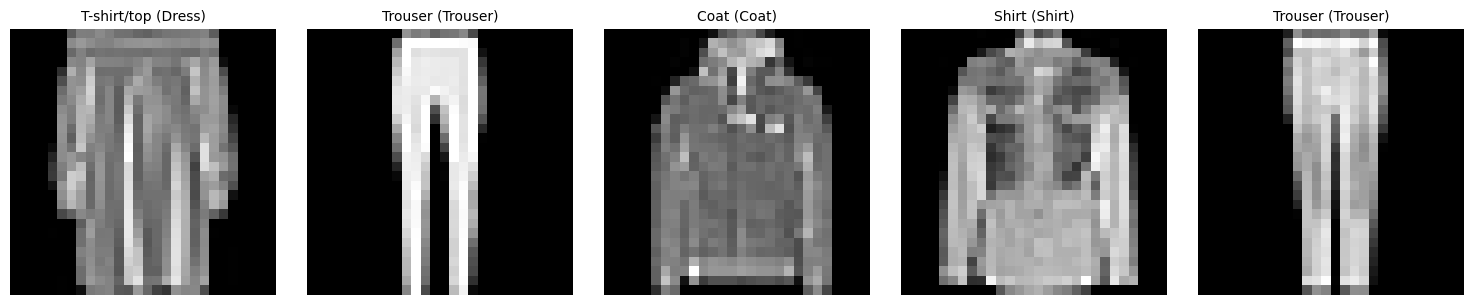

Accuracy on the test set: 0.8573
Classification Report for SVM Classifier with 60000 samples:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.78      0.76      1000
           3       0.85      0.88      0.86      1000
           4       0.76      0.78      0.77      1000
           5       0.95      0.93      0.94      1000
           6       0.66      0.57      0.61      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.96      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



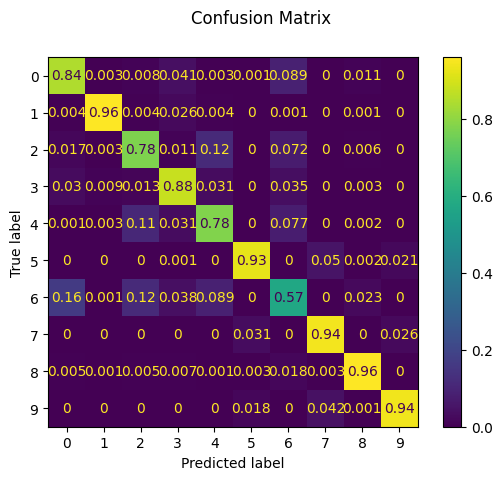

CPU times: user 5min 11s, sys: 2.85 s, total: 5min 13s
Wall time: 5min 16s


In [4]:
%%time
from sklearn.svm import SVC

# Create the Support Vector Classifier with specified parameters
svm_classifier = SVC(kernel='linear', C=0.025)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# print(np.shape(X_test))
# Change the upper bound for image index, because we only have 10,000 test samples.
image_index = np.random.randint(0, 10000, num_images_to_show)

plot_random_images(X_test, y_pred, y_test, kind="compare_labels", image_index=image_index)

generate_classification_report(y_test, y_pred)



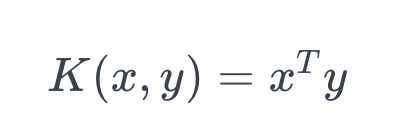

In Support Vector Machine (SVM) classifiers, the linear kernel is one of the kernel functions used to transform the input data into a higher-dimensional space. the linear kernel does not perform any explicit mapping to a higher-dimensional space. Instead, it computes the dot product between the feature vectors in the original input space. Where K(x,y) represents the inner product or dot product between the vectors x and y. The linear kernel is particularly useful when the data is linearly separable, meaning the classes can be separated by a straight line or hyperplane in the original input space.

In SVM, the regularization parameter (often denoted as C in some formulations) controls the trade-off between maximizing the margin and minimizing the classification error on the training data. The regularization parameter (C) in SVM is the inverse of the regularization strength. 

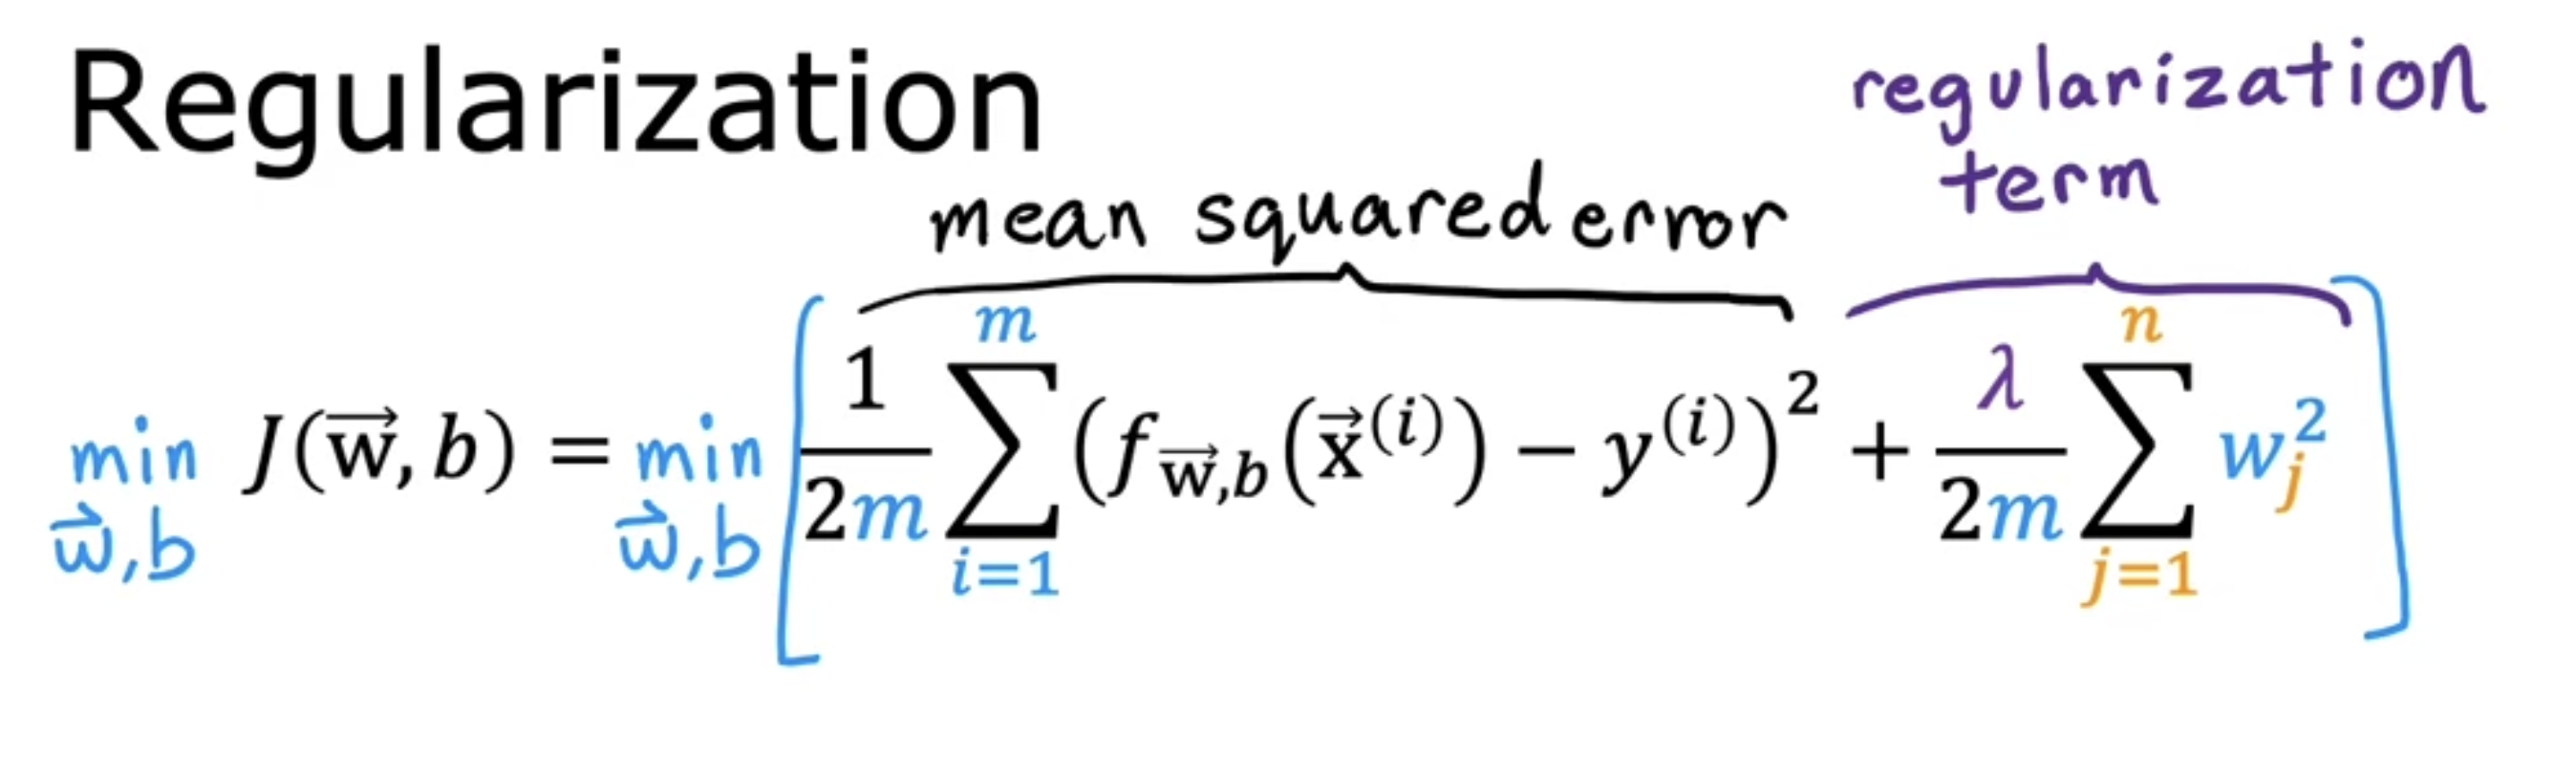

Overall, the primary objective of regularization in machine learning is to improve the model's ability to generalize to new data by preventing it from fitting too closely or overemphasizing the noise present in the training data.

#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

MLP: Multi-Layer Perceptron

The MLP is a type of artificial neural network composed of multiple layers of nodes (neurons) and is capable of learning complex patterns in data.

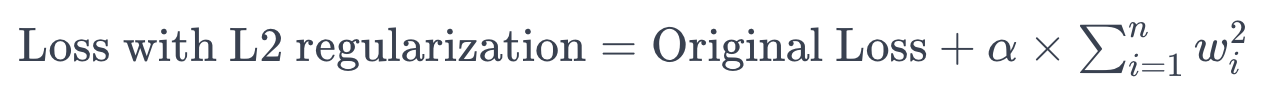

When would you choose L1 norm over L2 norm?

The more able a model is to ignore extreme values in the data, the more robust it is. The L1 norm is more robust than the L2 norm. for fairly obvious reasons: the L2 norm squares values, so it increases the cost of outliers exponentially; the L1 norm only takes the absolute value, so it considers them linearly.

Q: When would you choose L1 norm over L2 norm?

The L1 norm is the sum of the absolute values.
The L2 norm is the square root of the sum of the squared values
By squaring values, you are putting more emphasis on large values and less influence on small values.
For example, consider just the ten-element vector [1,1,1,1,1,1,1,1, 1, 10]. The L1 norm is 19, and the largest value, 10, contributes 10/19=53% of it.
The L2 norm is sqrt(109)=10.44, and the largest value contributes 100/109=92% of the sum.
Ultimately it depend on the real-world problem you are solving and the distribution of the numbers in your vector, but you should be aware that if the vector consists of large numbers and small numbers, you may be effectively ignoring the small numbers.
Another way of saying this is that the L1-Norm puts less emphasis on outliers than the L2 Norm does.

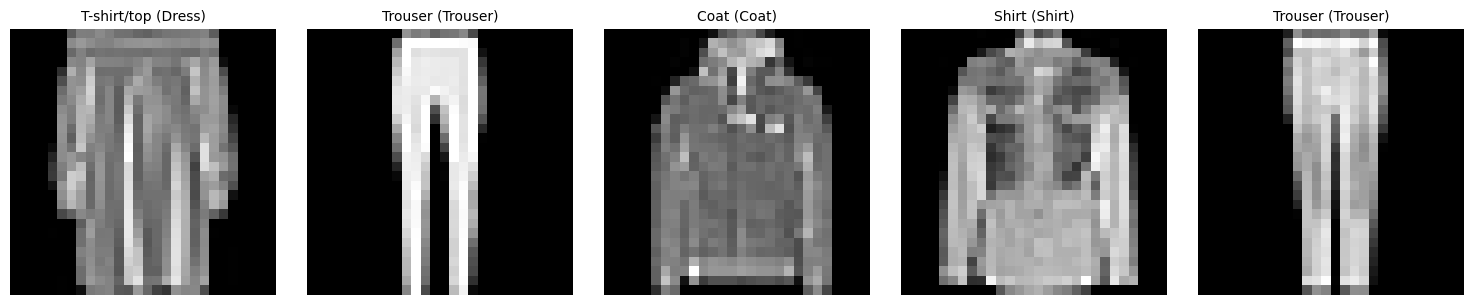

Accuracy on the test set: 0.8435
Classification Report for SVM Classifier with 10000 samples:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.82      0.66      0.73      1000
           3       0.86      0.86      0.86      1000
           4       0.72      0.80      0.76      1000
           5       0.91      0.93      0.92      1000
           6       0.59      0.67      0.62      1000
           7       0.90      0.93      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.92      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



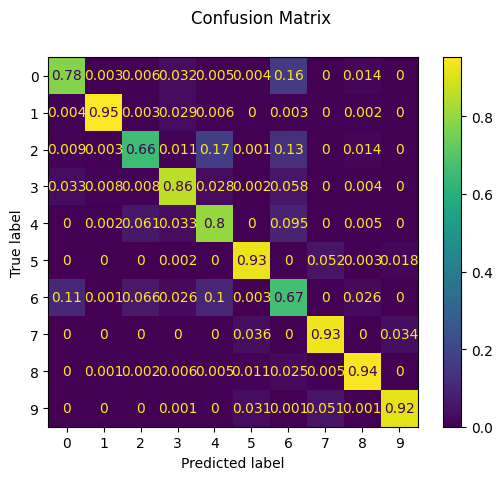

CPU times: user 1min 15s, sys: 5.98 s, total: 1min 21s
Wall time: 7.22 s


In [5]:
%%time
from sklearn.neural_network import MLPClassifier
    
# Create MLP classifier with specified parameters
# Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.
mlp_classifier = MLPClassifier(max_iter=1000, alpha=1)

# Use the first 10,000 training samples
max_samples = 10000

# Train the classifier with 10000 samples
# It basically means going through training data again and again, to compute loss, and adjust weight and bias. 

# %timeit -n1 -r1 mlp_classifier.fit(X_train[:max_samples], y_train[:max_samples])
mlp_classifier.fit(X_train[:max_samples], y_train[:max_samples])

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

plot_random_images(X_test, y_pred_mlp, y_test, kind="compare_labels", image_index=image_index)

generate_classification_report(y_test, y_pred_mlp, num_images=max_samples)

L1 regularization (Lasso), L2 regularization (Ridge), each using different penalty mechanisms to achieve the goal of controlling model complexity and preventing overfitting. L1 regularization encourages sparsity by penalizing the absolute size of the coefficients, while L2 regularization penalizes the squared size of the coefficients, typically resulting in smaller but non-zero coefficients.

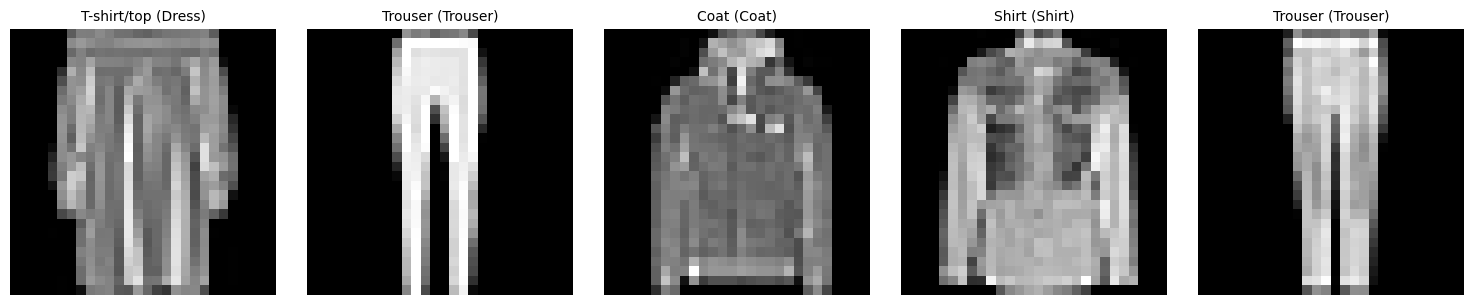

Accuracy on the test set: 0.8478
Classification Report for SVM Classifier with 60000 samples:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.68      0.74      1000
           3       0.86      0.85      0.85      1000
           4       0.66      0.88      0.76      1000
           5       0.92      0.92      0.92      1000
           6       0.70      0.55      0.62      1000
           7       0.90      0.92      0.91      1000
           8       0.93      0.96      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



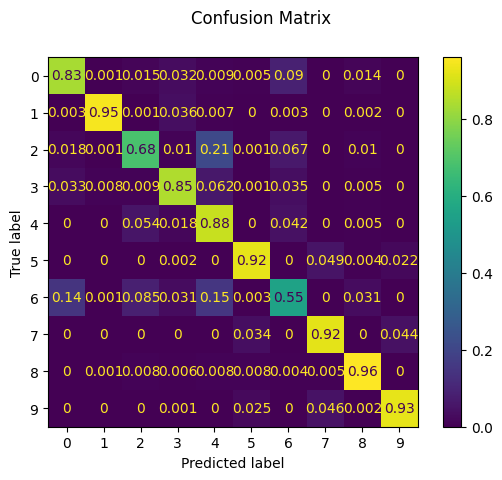

CPU times: user 11min 33s, sys: 35 s, total: 12min 8s
Wall time: 1min 6s


In [6]:
%%time
# Train the classifier with full dataset
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

plot_random_images(X_test, y_pred_mlp, y_test, kind="compare_labels", image_index=image_index)

generate_classification_report(y_test, y_pred_mlp)

### My thought about the difference between this MLP classifier and the above SVM classifier.

We  implemented the SVM classifier with a linear kernel and MLP classifier with the L2 Penalty of 1.

SVM: SVM is a discriminative model that finds the optimal hyperplane (decision boundary) that best separates the classes in the input space. It aims to maximize the margin, i.e., the distance between the hyperplane and the closest data points of each class.
MLP: MLP is a type of neural network that consists of multiple layers of interconnected nodes (neurons) organized in an input layer, one or more hidden layers, and an output layer. It's capable of learning complex nonlinear relationships in data by adjusting weights between neurons.

#### For the whole training simple

1.  
    | Classifier | Training Time |
    | ---------- | ------------- |
    | SVM        | 5min 16s      |
    | **MLP**    | **1min 6s**   |

---

2.  
    | Classifier | Accuracy      |
    | ---------- | ------------- |
    | **SVM**    | **0.8573**    |
    | MLP        | 0.8478        |

---

3.  macro avg:

    | Classifier | Precision     | Recall        | F1-Score      |
    | ---------- | ------------- | ------------- | ------------- |
    | **SVM**    | **0.86**      | **0.86**      | **0.86**      |
    | MLP        | 0.85          | 0.85          | 0.85          |

    weigted avg:

    | Classifier | Precision     | Recall        | F1-Score      |
    | ---------- | ------------- | ------------- | ------------- |
    | **SVM**    | **0.86**      | **0.86**      | **0.86**      |
    | MLP        | 0.85          | 0.85          | 0.85          |

    The MLP classifier and the SVM classifier have similar the macro avg and weighted avg scores for precision, recall, and F1-score.

    The macro avg takes the unweighted mean of metrics for each class. It treats all classes equally, regardless of class imbalance.
    
    The weighted avg calculates metrics by taking the weighted average of scores, considering the number of samples for each class.

    <!-- 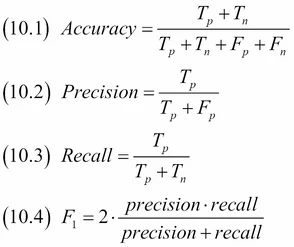 -->
---

4.  Overall Evaluation: the SVM classifier showed a slightly higher accuracy compared to the MLP classifier, but MLP classfier trains much faster than the SVM classifier on the FashionMNIST dataset.


### How does ML perform with non-linear data

When dealing with non-linear data, using a Multi-Layer Perceptron (MLP) neural network can potentially increase the performance compared to linear models like SVMs or logistic regression. MLPs are particularly well-suited for handling non-linear relationships and complex patterns present in the data due to their ability to learn and model non-linear functions through multiple layers of neurons.

Here's why using an MLP on non-linear data might improve performance:

Capacity for Complex Representations: MLPs with multiple hidden layers and non-linear activation functions (such as ReLU, sigmoid, tanh) can approximate complex non-linear functions. This allows them to capture intricate relationships present in non-linear data.

Feature Representation: Through its hidden layers, an MLP can create hierarchical representations of the input data, extracting features and patterns at different levels of abstraction. This capacity enables it to learn more intricate structures within the data.

Adaptability: MLPs can adjust their internal parameters (weights and biases) during training, enabling them to fit complex decision boundaries that can capture non-linear relationships between input features and output labels.

However, using an MLP on non-linear data does not guarantee improved performance in all cases. There are several considerations to keep in mind:

Model Complexity: With increased capacity to capture non-linearities comes the risk of overfitting, especially with limited data. A very complex model might learn noise in the training set, reducing its ability to generalize to unseen data.

Hyperparameter Tuning: Proper hyperparameter tuning (e.g., number of layers, number of neurons per layer, learning rate, regularization) is crucial. Inadequate tuning might lead to suboptimal performance or overfitting.

Data Quality and Quantity: The success of an MLP on non-linear data depends on the quality and quantity of the data. Insufficient or noisy data might hinder the model's ability to learn meaningful non-linear patterns.

In conclusion, using an MLP on non-linear data has the potential to improve performance due to its capacity to model complex relationships. However, proper tuning, regularization, and consideration of data quality are essential to harness its capabilities effectively and avoid overfitting.

### Who is better?
The performance of Multi-Layer Perceptron (MLP) and Support Vector Machines (SVM) in image classification tasks can vary based on several factors, including the complexity of the dataset, the size and quality of the dataset, the chosen hyperparameters, and the specific characteristics of the problem.

Both MLPs and SVMs have been used successfully for image classification tasks, and the choice between them might depend on the following considerations:

1. **Dataset Size**:
   - **Large Datasets**: In scenarios where you have a large dataset, MLPs might perform well due to their ability to learn complex representations from a large volume of data.
   - **Small Datasets**: SVMs can work well with smaller datasets and might generalize better when the dataset size is limited, preventing overfitting.

2. **Feature Complexity**:
   - **Linear vs. Non-linear Relationships**: If the image classification task involves highly non-linear relationships between pixel values, textures, and features, an MLP with its ability to learn complex non-linear functions might have an advantage over linear SVMs.

3. **Model Complexity**:
   - **Complexity of Decision Boundary**: MLPs with multiple hidden layers can learn highly complex decision boundaries, potentially capturing intricate patterns in images. SVMs with appropriate kernel functions can also handle non-linear boundaries, but might be limited compared to highly layered MLPs.

4. **Training Time and Resources**:
   - **Computational Resources**: Training an MLP might require more computational resources (especially for larger architectures) compared to SVMs, which can impact training time and resource availability.

5. **Hyperparameter Tuning**:
   - Proper tuning of hyperparameters (such as learning rate, number of layers, number of neurons, regularization) for both MLPs and SVMs is crucial. The performance of either model can heavily depend on the selection and optimization of these hyperparameters.

6. **Interpretability**:
   - SVMs often provide more straightforward interpretability of the decision boundary due to the concept of support vectors, whereas interpreting the decisions made by complex MLP architectures might be more challenging.

In practice, there's no definitive answer regarding which algorithm performs universally better for image classification. It often depends on experimentation, the characteristics of the dataset, computational resources, and the specific goals of the project. Both MLPs and SVMs have their strengths and weaknesses, and the choice between them might vary based on the specific requirements and constraints of the problem at hand.

#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics.

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

In [7]:
import cv2

# Sobel edge detection function
def apply_sobel_edge_detection(images):
    ddepth = cv2.CV_64F  # 64-bit float output
    dx = 1  # First-order derivative in x-direction
    dy = 0  # NO derivative in y-direction
    processed_images = []
    for img in images:
        # Reshape image to 28x28 (FashionMNIST image size)
        reshaped_img = img.reshape(28, 28)

        # Data type accept: uint8 or float32
        # Apply Sobel edge detection
        sobelx = cv2.Sobel(reshaped_img, ddepth, dx, dy)
        sobely = cv2.Sobel(reshaped_img, ddepth, dy, dx)
        sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
        
        # Flatten images so that MLP classifier fit function accepts its dimension
        processed_images.append(sobel.flatten())
        
    return processed_images

# Use the same data as Q4
# Apply Sobel edge detection on training and testing images
X_train_sobel = apply_sobel_edge_detection(X_train)
X_test_sobel = apply_sobel_edge_detection(X_test)

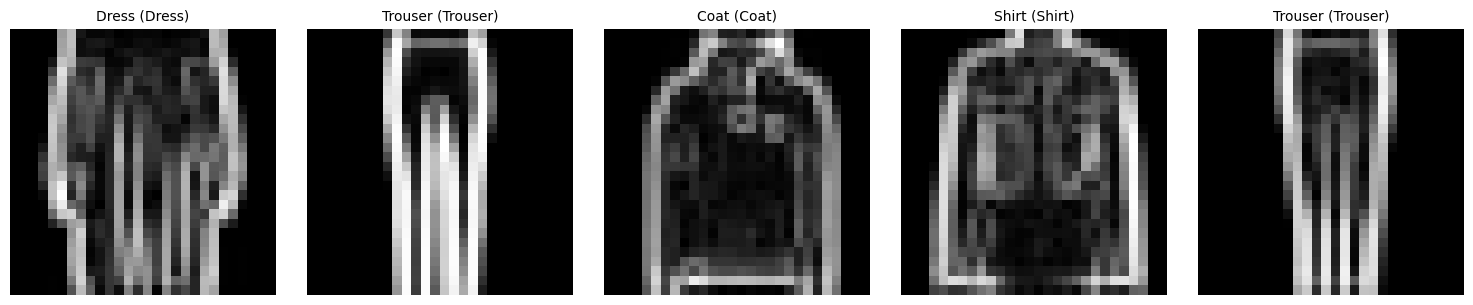

Accuracy on the test set: 0.8744
Classification Report for SVM Classifier with 60000 samples:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.97      0.97      0.97      1000
           2       0.76      0.87      0.81      1000
           3       0.87      0.87      0.87      1000
           4       0.76      0.83      0.79      1000
           5       0.94      0.96      0.95      1000
           6       0.80      0.54      0.65      1000
           7       0.93      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



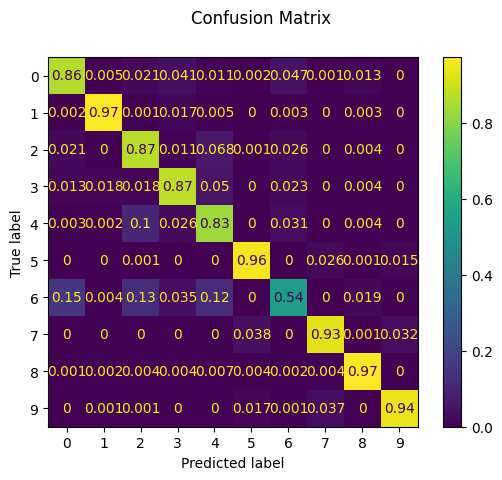

CPU times: user 9min 51s, sys: 37.9 s, total: 10min 29s
Wall time: 58.2 s


In [8]:
%%time
# Create and train MLP classifier on Sobel processed images
mlp_classifier.fit(X_train_sobel, y_train)

# Predict on the test set using Sobel processed images
y_pred_sobel = mlp_classifier.predict(X_test_sobel)

plot_random_images(X_test_sobel, y_pred_sobel, y_test, kind="compare_labels", image_index=image_index)

generate_classification_report(y_test, y_pred_sobel)

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above.

In [9]:
def apply_bilateral_filter(images):
    processed_images = []
    for img in images:
        # Reshape image to 28x28 (FashionMNIST image size)
        reshaped_img = img.reshape(28, 28)
        
        # Apply a bilateral filter
        img_bilateral = cv2.bilateralFilter(reshaped_img, 9, 85, 85)

        # Flatten images so that MLP classifier fit function accepts its dimension
        processed_images.append(img_bilateral.flatten())

    return processed_images

# Apply bilateral filter on training and testing images
X_train_bilateral = apply_bilateral_filter(X_train)
X_test_bilateral = apply_bilateral_filter(X_test)

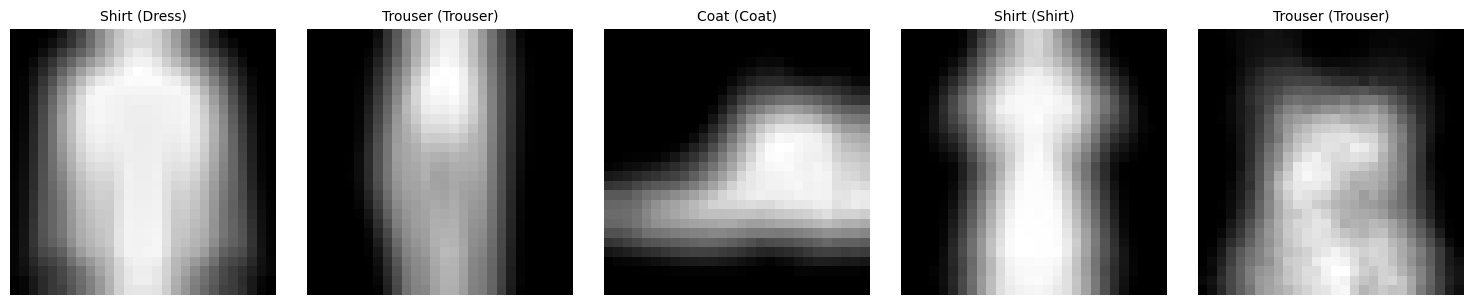

Accuracy on the test set: 0.7988
Classification Report for SVM Classifier with 60000 samples:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1000
           1       0.91      0.94      0.92      1000
           2       0.72      0.67      0.69      1000
           3       0.77      0.84      0.80      1000
           4       0.67      0.79      0.73      1000
           5       0.85      0.94      0.89      1000
           6       0.52      0.53      0.52      1000
           7       0.93      0.79      0.86      1000
           8       0.96      0.91      0.93      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



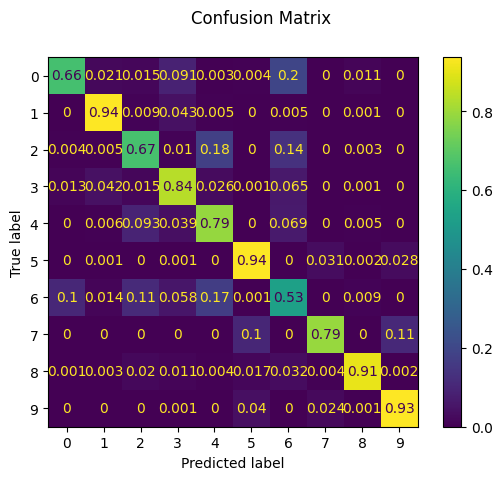

CPU times: user 10min 41s, sys: 40.9 s, total: 11min 22s
Wall time: 1min 3s


In [10]:
%%time
# Create and train MLP classifier on the processed images
mlp_classifier.fit(X_train_bilateral, y_train)

# Predict on the test set using the processed images
y_pred_bilateral = mlp_classifier.predict(X_test_bilateral)

plot_random_images(X_train_bilateral, y_pred_bilateral, y_test, kind="compare_labels", image_index=image_index)

generate_classification_report(y_test, y_pred_bilateral)


#### Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

#### For the whole training simple

1.  
    | Filter    | Classifier | Time        |
    | --------- | ---------- | ----------- |
    | None      | MLP        | 1min 6s     |
    | **Sobel** | MLP        | **58.2 s**  |
    | Bilateral | MLP        | 1min 3s     |

---

2.  
    | Filter    | Classifier | Accuracy        |
    | --------- | ---------- | -------------   |
    | None      | MLP        | 0.8478          |
    | **Sobel** | MLP        | **0.8744**      |
    | Bilateral | MLP        | 0.7988          | 

---

3.  macro avg:

    | Filter    | Classifier | Precision     | Recall        | F1-Score      |
    | --------- | ---------- | ------------- | ------------- | ------------- |
    | None      | MLP        | 0.85          | 0.85          | 0.85          |
    | **Sobel** | MLP        | **0.87**      | **0.87**      | **0.87**      |
    | Bilateral | MLP        | 0.80          | 0.80          | 0.80          |

    weigted avg:
    
    | Filter    | Classifier | Precision     | Recall        | F1-Score      |
    | --------- | ---------- | ------------- | ------------- | ------------- |
    | None      | MLP        | 0.85          | 0.85          | 0.85          |
    | **Sobel** | MLP        | **0.87**      | **0.87**      | **0.87**      |
    | Bilateral | MLP        | 0.80          | 0.80          | 0.80          |
    
    **sobel edge-based classification** > original-image-based classification (MLP) > bilateral filtered-image-based classificatio

---

4.  Overall Evaluation:

    Time: **sobel edge-based classificatio** < bilateral filtered-image-based classification < original-image-based classification (MLP)
    
    Accuracy: **sobel edge-based classificatio** > original-image-based classification (MLP) > bilateral filtered-image-based classification

    Macro avg: **sobel edge-based classificatio** > original-image-based classification (MLP) > bilateral filtered-image-based classification

    Weigted avg:  **sobel edge-based classificatio** > original-image-based classification (MLP) > bilateral filtered-image-based classification


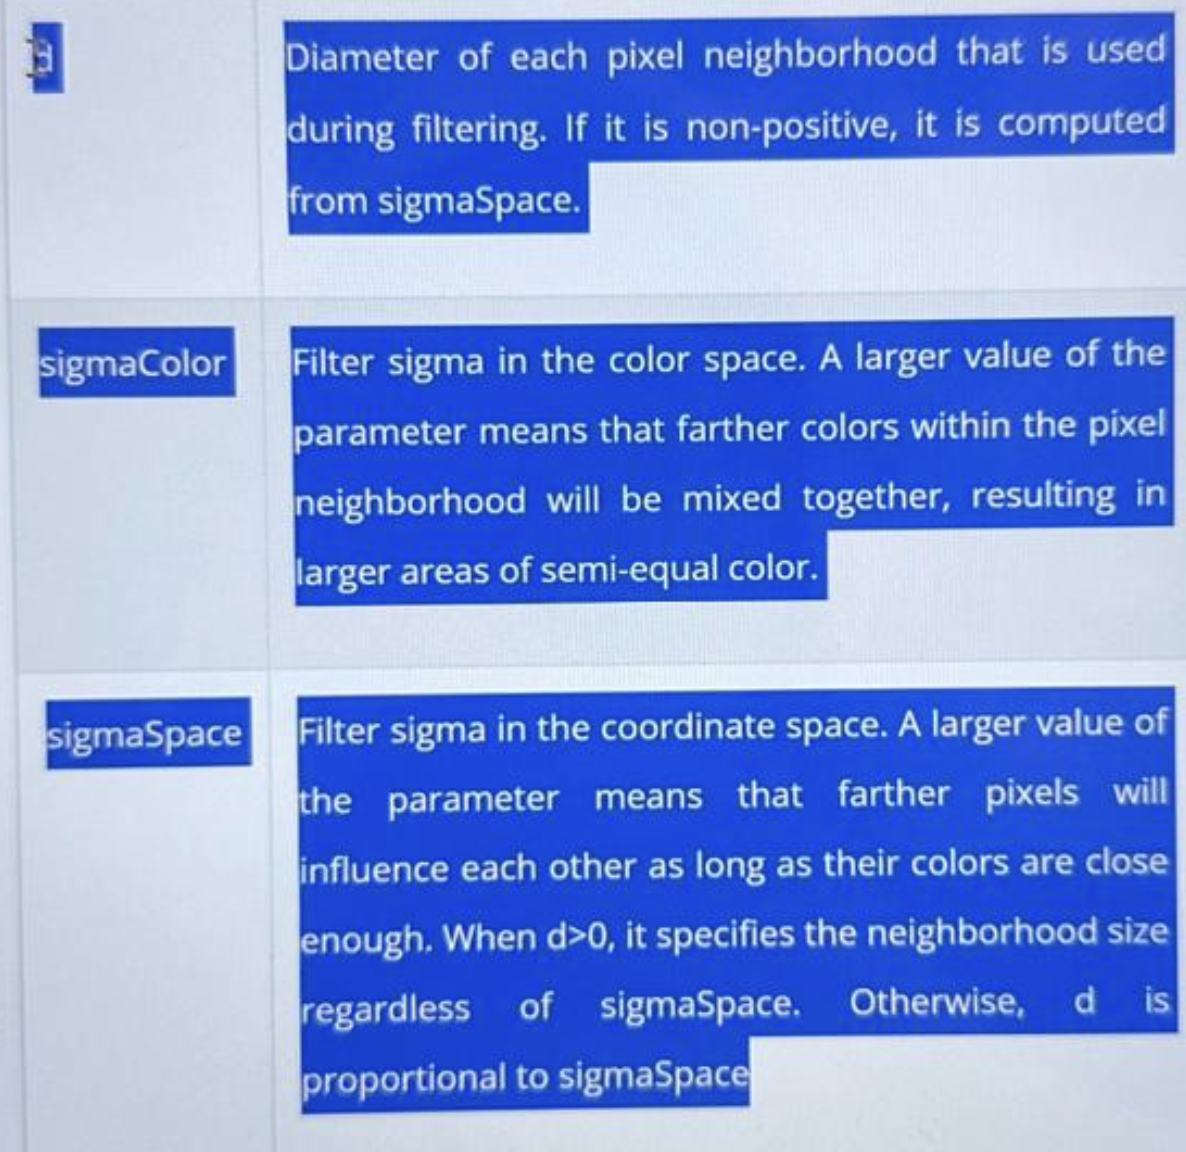

In OpenCV, bilateral filtering and Sobel edge detection are two different image processing techniques used for distinct purposes:

1. **Bilateral Filtering**:
   - **Purpose**: Bilateral filtering is a non-linear filtering technique used for image denoising and preserving edges while reducing noise.
   - **Functionality**: It smooths images by averaging pixel values within a neighborhood while also considering the intensity differences between neighboring pixels. It applies a weighted average based on both spatial distance and pixel intensity differences.
   - **Edge Preservation**: Bilateral filtering is effective in reducing noise while preserving edges, as it tends to avoid blurring across sharp intensity changes (edges) in the image.

2. **Sobel Edge Detection**:
   - **Purpose**: Sobel edge detection is an edge detection algorithm used to identify edges in an image by calculating the gradient magnitude.
   - **Functionality**: It convolves the image with a pair of 3x3 filters (one for detecting changes in the x-direction and another for the y-direction) to compute the gradient in both directions. The gradient magnitude is then calculated to identify areas of significant intensity change, which often correspond to edges.
   - **Edge Detection**: Sobel operators highlight regions of rapid intensity change in an image, typically indicating the presence of edges.

**Key Differences**:

- **Purpose**: Bilateral filtering is for noise reduction while preserving edges, while Sobel edge detection is specifically for detecting edges in images.
- **Operation**: Bilateral filtering smooths images by considering spatial distances and intensity differences, while Sobel edge detection calculates gradients to highlight areas of intensity change.
- **Output**: Bilateral filtering results in a denoised image, whereas Sobel edge detection produces an image emphasizing edge regions by highlighting intensity changes.

Both bilateral filtering and Sobel edge detection serve different purposes in image processing and can be used together in a pipeline to preprocess images before performing edge detection or other analysis tasks that require noise reduction or edge preservation.